## In this notebook we are trying to predict how food consumption and health factors influences the COVID-19 fatality rates around the world 

In [1]:
# Loading the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

In [2]:
# Importing all the datasets required
covid_food_data = pd.read_csv("../data/covid_food_supply.csv")

## Data description

In [3]:
# Checking for the number of rows and columns in a dataset.
covid_food_data.shape

(170, 32)

In [4]:
# Checking the attributes in the dataset
covid_food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal fats                   170 non-null    float64
 3   Animal Products               170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Milk - Excluding Butter       170 non-null    float64
 11  Miscellaneous                 170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

In [5]:
# display all the columns
pd.options.display.max_columns = None
# Prints the top 5 rows of the dataset
covid_food_data.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.0,0.0770,0.5345,6.7642,40.5645,4.5,29.8,0.091130,0.003034,0.060712,0.027384,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.0,0.1515,0.3261,11.7753,31.2304,22.3,6.2,0.144116,0.003946,0.081431,0.058739,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.0,0.1152,1.0310,11.6484,40.3651,26.6,3.9,0.052041,0.002430,0.036186,0.013425,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.0,0.0061,0.6463,2.3041,45.0722,6.8,25,0.002168,0.000089,0.000680,0.001399,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,0.7139,0.2219,0.2172,0.1840,0.1524,1.4522,0.1564,3.8749,0.0,0.0253,0.8102,5.4495,33.3233,19.1,NaN,0.077551,0.003061,0.058163,0.016327,98000.0,%


In [6]:
# Prints the bottom 5 rows of the dataset
covid_food_data.tail()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,0.0702,0.2078,0.0281,0.3342,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,25.2,21.2,0.041512,0.000391,0.013866,0.027254,28645000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,0.0126,0.4149,0.8410,0.2032,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,2.1,9.3,0.000398,0.000000,0.000371,0.000027,96209000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,0.2033,0.2827,0.0893,0.8645,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,14.1,38.9,0.005385,0.001492,0.002387,0.001505,29826000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,0.2149,0.3048,1.8736,0.1756,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,6.5,46.7,0.016210,0.000653,0.007953,0.007604,18384000.0,%
169,Zimbabwe,4.0552,0.0755,8.1489,0.0000,22.6240,0.2678,0.5518,2.2000,2.6142,4.4310,0.2012,0.2086,0.4498,0.4261,0.0252,2.9870,0.1494,4.6485,0.000,0.0518,1.7103,2.3213,41.8526,12.3,51.3,0.010839,0.000168,0.003176,0.007495,14863000.0,%


In [7]:
# checking the statistical summary of the dataset 
covid_food_data.describe()

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,167.000000,161.000000,161.000000,161.000000,159.000000,1.700000e+02
mean,3.022971,0.221064,12.181871,0.013994,11.800347,0.470570,1.387195,5.621405,3.375934,6.519776,0.443122,0.193435,0.818120,0.537131,0.091011,5.335371,0.201946,2.799115,0.095846,0.117474,0.851554,6.085912,37.814834,18.707784,0.219348,0.007617,0.138154,0.069656,4.452364e+07
std,2.382243,0.278304,5.852635,0.129382,5.824870,0.331209,1.257382,3.152849,1.762911,5.020379,0.685727,0.159634,1.772273,0.601111,0.121898,5.571355,0.189239,1.545951,0.379936,0.146143,0.445335,3.560148,5.852943,9.633557,0.308249,0.014153,0.223507,0.113325,1.564182e+08
min,0.000000,0.001000,1.739100,0.000000,3.401400,0.023900,0.034200,0.659600,0.356000,0.096300,0.000000,0.000000,0.009800,0.000000,0.000000,0.679600,0.004200,0.366600,0.000000,0.000000,0.091500,0.857000,23.113200,2.100000,0.000262,0.000000,0.000000,0.000000,5.400000e+04
25%,0.895625,0.040225,7.236850,0.000000,7.226850,0.187575,0.557100,3.541950,1.891475,2.172250,0.032325,0.105050,0.134075,0.129650,0.016500,2.023825,0.083325,1.721025,0.000000,0.020750,0.507700,3.616500,33.552775,8.500000,0.024946,0.000391,0.010558,0.003618,2.816250e+06
50%,2.866150,0.116850,12.097550,0.000000,10.142750,0.460150,1.029250,5.021250,3.424750,5.336900,0.196850,0.166800,0.326650,0.300800,0.042550,3.108650,0.159450,2.601650,0.000000,0.079950,0.774450,5.028100,37.900700,21.200000,0.079866,0.001902,0.041671,0.015089,1.018150e+07
75%,4.710950,0.253900,16.444125,0.001400,15.148950,0.644150,1.821275,6.827750,4.422450,10.407100,0.583625,0.228575,0.691675,0.734900,0.123150,5.745875,0.261800,3.782150,0.000000,0.148650,1.070900,7.801650,42.762775,25.700000,0.300331,0.006747,0.175000,0.077692,3.271625e+07
max,15.370600,1.355900,26.886500,1.679400,29.804500,1.696000,8.795900,19.302800,8.170000,20.837800,3.663400,1.225600,12.176300,3.483800,0.662600,27.712800,1.282300,9.725900,3.067700,0.756900,2.202600,19.299500,48.258500,45.600000,1.699692,0.085106,1.550046,0.690585,1.402385e+09


## Data Cleaning and Pre-processing

#### Looking for the missing values in the dataset

In [8]:
#Check for nulls in the dataset and count for the number of nulls
covid_food_data.isna().sum()

Country                          0
Alcoholic Beverages              0
Animal fats                      0
Animal Products                  0
Aquatic Products, Other          0
Cereals - Excluding Beer         0
Eggs                             0
Fish, Seafood                    0
Fruits - Excluding Wine          0
Meat                             0
Milk - Excluding Butter          0
Miscellaneous                    0
Offals                           0
Oilcrops                         0
Pulses                           0
Spices                           0
Starchy Roots                    0
Stimulants                       0
Sugar & Sweeteners               0
Sugar Crops                      0
Treenuts                         0
Vegetable Oils                   0
Vegetables                       0
Vegetal Products                 0
Obesity                          3
Undernourished                   7
Confirmed                        9
Deaths                           9
Recovered           

#### Handling missing values in the columns Obesity and Undernourished

In [9]:
#manupilating the column missing values with their mean
#the missing values of obesity cannot be zero so its replaced by the mean of the column
covid_food_data['Obesity'].fillna((covid_food_data['Obesity'].mean()), inplace=True)

# the column Undernourished is of type 'object' and it has entries '<2.5'
#replacing <2.5 with 2.5 and changing the object type to float
covid_food_data['Undernourished'] = covid_food_data['Undernourished'].replace(['<2.5'],2.5)
covid_food_data['Undernourished'] = covid_food_data['Undernourished'].astype('float64') 
covid_food_data['Undernourished'].dtype

# replacing the missing values with the mean
covid_food_data['Undernourished'].fillna((covid_food_data['Undernourished'].mean()), inplace=True)

#### Handling missing values in the column  Confirmed, Deaths, Recovered

In [10]:
# dropping rows that has missing values for confirmed deaths and recovered columns. 
# Since most of them are geographically dispersed islands and are not affected by covid
covid_food_data.dropna(axis=0,subset = ['Confirmed', 'Deaths'], inplace=True)
covid_food_data.reset_index(drop=True, inplace=True)

#### Handling missing values in the column Active
#### The data for confirmed COVID cases, deaths, and recovered are available (not missing) in the data, so we replaced the missing values in the 'Active' column appropriately by subtracting the confirmed cases by deaths and recovered

In [11]:
# handling the missing values for 'Active'
# we have the confirmed covid cases, deaths and recovered
# Replacing the missing values in the 'Active' column appropriately
missing_active_cases = covid_food_data['Confirmed'] - covid_food_data['Deaths'] - covid_food_data['Recovered']
covid_food_data['Active'].fillna(missing_active_cases, inplace=True) 
covid_food_data.isna().sum()

Country                         0
Alcoholic Beverages             0
Animal fats                     0
Animal Products                 0
Aquatic Products, Other         0
Cereals - Excluding Beer        0
Eggs                            0
Fish, Seafood                   0
Fruits - Excluding Wine         0
Meat                            0
Milk - Excluding Butter         0
Miscellaneous                   0
Offals                          0
Oilcrops                        0
Pulses                          0
Spices                          0
Starchy Roots                   0
Stimulants                      0
Sugar & Sweeteners              0
Sugar Crops                     0
Treenuts                        0
Vegetable Oils                  0
Vegetables                      0
Vegetal Products                0
Obesity                         0
Undernourished                  0
Confirmed                       0
Deaths                          0
Recovered                       0
Active        

In [12]:
# Prints the bottom 5 rows of the dataset
covid_food_data.tail()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
156,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,0.0702,0.2078,0.0281,0.3342,0.0009,2.5643,0.1479,3.4106,0.000,0.0009,1.3734,4.1474,35.2416,25.2,21.2,0.041512,0.000391,0.013866,0.027254,28645000.0,%
157,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,0.0126,0.4149,0.8410,0.2032,0.2074,1.0596,0.2880,1.2846,0.815,0.3070,0.2201,11.9508,41.4232,2.1,9.3,0.000398,0.000000,0.000371,0.000027,96209000.0,%
158,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,1.8911,0.2033,0.2827,0.0893,0.8645,0.0347,1.0794,0.2199,5.0468,0.000,0.0017,1.0811,3.2135,44.2126,14.1,38.9,0.005385,0.001492,0.002387,0.001505,29826000.0,%
159,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,0.2149,0.3048,1.8736,0.1756,0.0478,7.9649,0.0618,1.5632,0.000,0.0014,0.6657,3.4649,43.9789,6.5,46.7,0.016210,0.000653,0.007953,0.007604,18384000.0,%
160,Zimbabwe,4.0552,0.0755,8.1489,0.0000,22.6240,0.2678,0.5518,2.2000,2.6142,4.4310,0.2012,0.2086,0.4498,0.4261,0.0252,2.9870,0.1494,4.6485,0.000,0.0518,1.7103,2.3213,41.8526,12.3,51.3,0.010839,0.000168,0.003176,0.007495,14863000.0,%


#### To find out which food products is highly consumed by the population all over the world

In [13]:
# taking the transpose of the dataset
covid_food_data_transpose = covid_food_data.transpose()
print(covid_food_data_transpose.shape)


(32, 161)


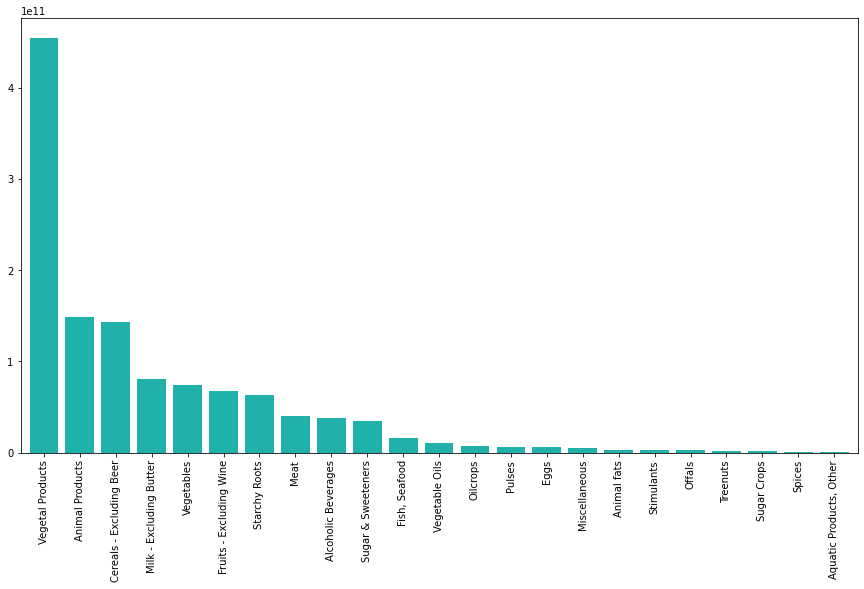

In [14]:
# extracting the sum of population of all the countries
population = covid_food_data_transpose[30:31].sum(axis = 1)
# extracting the sum of all products
food_products_percentage = covid_food_data_transpose[1:24].sum(axis =1, skipna = True)
# caluculating the actual values of the products
food_products_population = (food_products_percentage * population.values)/100
barplot = food_products_population.sort_values(ascending=False).plot(kind='bar',width = 0.8, figsize=(15, 8), color = 'lightseagreen')

#### It is observed that all the animal generated products specifically 'Animal fats', 'Aquatic Products, Other','Eggs','Fish, Seafood', 'Meat', 'Milk - Excluding Butter', 'Offals' together add up to the column Animal Products.
#### Similarly tree or plant generated products add up to the 'Vegetal Products' column
#### Confirming the same with the below code

In [15]:
# Step1 : summing all the columns and storing them in a new column 'Summing Animal related Products'
covid_food_data['Summing Animal related Products'] = covid_food_data['Animal fats'] + covid_food_data['Aquatic Products, Other'] + covid_food_data['Eggs'] + covid_food_data['Fish, Seafood'] + covid_food_data['Meat'] + covid_food_data['Milk - Excluding Butter'] + covid_food_data['Offals']
covid_food_data['Animal Products'] = np.round(covid_food_data['Animal Products'], decimals=2)
covid_food_data['Summing Animal related Products'] = np.round(covid_food_data['Summing Animal related Products'], decimals=2)
covid_food_data.tail()

# Step2 : After aggregating, cross checking with the Animal Products column
if (covid_food_data['Animal Products'].all() == covid_food_data['Summing Animal related Products'].all()):
    print('Both the columns are same - Animal Products')
else:
    print('Both the columns are not same - Animal Products')
    
# Step3 : Performing a similar analysis on the tree or plant generated products and 'vegetal Products' column
covid_food_data['Summing vegetable related Products'] = covid_food_data['Alcoholic Beverages'] + covid_food_data['Cereals - Excluding Beer'] + covid_food_data['Fruits - Excluding Wine'] + covid_food_data['Miscellaneous'] + covid_food_data['Oilcrops'] + covid_food_data['Pulses'] + covid_food_data['Spices'] + covid_food_data['Starchy Roots'] + covid_food_data['Stimulants'] + covid_food_data['Sugar & Sweeteners'] + covid_food_data['Sugar Crops'] + covid_food_data['Treenuts'] + covid_food_data['Vegetable Oils'] + covid_food_data['Vegetables']
covid_food_data['Vegetal Products'] = np.round(covid_food_data['Vegetal Products'], decimals=2)
covid_food_data['Summing vegetable related Products'] = np.round(covid_food_data['Summing vegetable related Products'], decimals=2)
covid_food_data.tail()

if (covid_food_data['Vegetal Products'].all() == covid_food_data['Summing vegetable related Products'].all()):
    print('Both the columns are same - Vegetable Products')
else:
    print('Both the columns are not same - Vegetable Products')

Both the columns are same - Animal Products
Both the columns are same - Vegetable Products


#### Dropping the column Unit (all except Population) as it doesn't specify anything in detail

In [16]:
#Unit (all except Population) column does not have any values - This can be deleted
covid_food_data = covid_food_data.drop(['Unit (all except Population)'], axis=1)

#### From the above observation, it is clear that the animal generated products like meat, milk , eggs etc. add up to the 'Animal Products' column and
#### Tree or plant generated products like Pulses, Cereals etc. including alcohol add up to the 'Vegetal Products' column
#### So, for further analysis taking only the Country, Animal Products, Vegetal Products, Obesity, Undernourished, Confirmed, Deaths, Recovered, Active, Population into consideration. Moreover, it is observed that Cereals - Excluding Beer is the highly consumed product. So, including this column as well to gain more insights

In [17]:
covid_food_data = pd.DataFrame(covid_food_data, columns = ['Country', 'Animal Products', 'Cereals - Excluding Beer', 'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population'])

#### Data reduction. Since the data in the sample has long decimal values, we rounded them to 4 decimal places inorder to reduce the storage capacity

In [18]:
covid_food_data = np.round(covid_food_data, decimals=4)

In [19]:
covid_food_data.head()

,Country,Animal Products,Cereals - Excluding Beer,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,9.43,24.8097,40.56,4.5,29.8000,0.0911,0.0030,0.0607,0.0274,38928000.0
1,Albania,18.77,5.7817,31.23,22.3,6.2000,0.1441,0.0039,0.0814,0.0587,2838000.0
2,Algeria,9.63,13.6816,40.37,26.6,3.9000,0.0520,0.0024,0.0362,0.0134,44357000.0
3,Angola,4.93,9.1085,45.07,6.8,25.0000,0.0022,0.0001,0.0007,0.0014,32522000.0
4,Antigua and Barbuda,16.66,5.9960,33.32,19.1,11.2294,0.0776,0.0031,0.0582,0.0163,98000.0


## Exploratory Data Analysis

In [20]:
import warnings
warnings.filterwarnings('ignore')

#### Plotting a bargraph to observe the top 15 countries with highest death rate reported

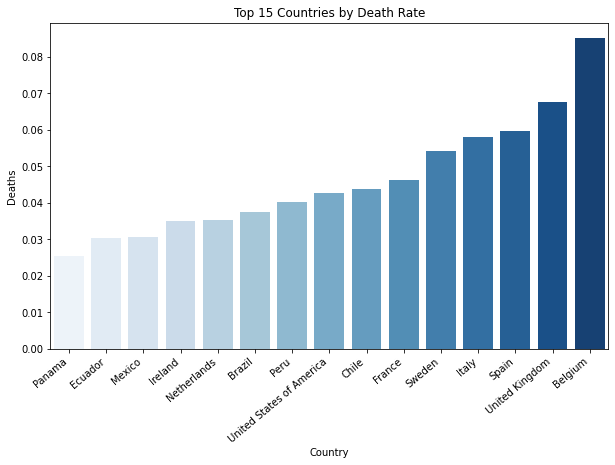

In [21]:
covid_food_analysis = pd.DataFrame(covid_food_data, columns = ['Country', 'Animal Products', 'Cereals - Excluding Beer', 'Vegetal Products', 'Obesity', 'Undernourished', 'Deaths', 'Population'])
# replacing death % value with number of deaths
covid_food_analysis.Deaths = np.round(covid_food_analysis.Deaths, decimals =4)
covid_food_analysis_sorted = covid_food_analysis.sort_values(by=['Deaths'])
# top 15 countries based on death rate
highest_deathRate_countries = covid_food_analysis_sorted.tail(15)
#bar plot
plt.figure(figsize=(10,6)) 
ax = sns.barplot('Country', 'Deaths', data = highest_deathRate_countries, palette="Blues")
ax.set_title('Top 15 Countries by Death Rate')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha = 'right')
plt.show()

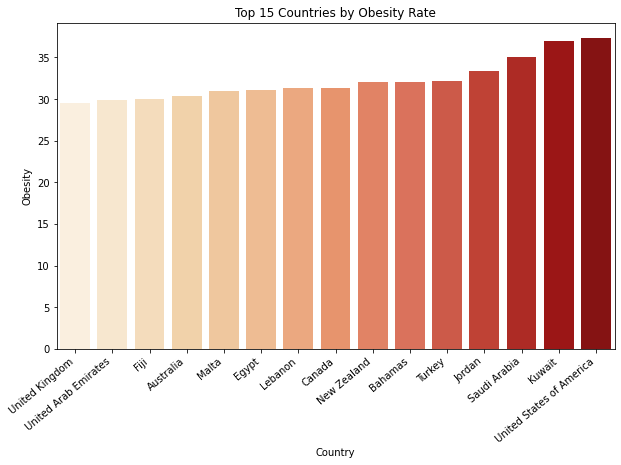

In [22]:
# top 15 countries facing obesity issues
covid_food_analysis.Obesity = np.round(covid_food_analysis.Obesity, decimals =4)
Obesity_sorted = covid_food_analysis.sort_values(by=['Obesity'])
# top 15 countries based on Obesity rate
highest_ObesityRate_countries = Obesity_sorted.tail(15)
# bar plot
plt.figure(figsize=(10,6)) 
ax = sns.barplot('Country', 'Obesity', data = highest_ObesityRate_countries, palette="OrRd" )
ax.set_title('Top 15 Countries by Obesity Rate')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha = 'right')
plt.show()

#### Plotting a bargraph to observe the top 15 countries with Highest Obesity Rate

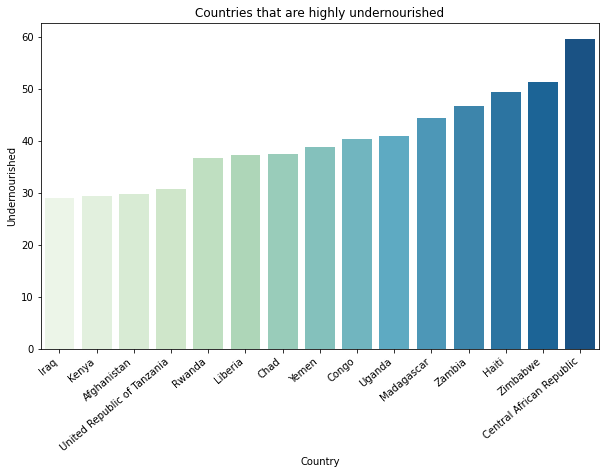

In [23]:
# top 15 countries facing Undernourished issues
covid_food_analysis.Undernourished = np.round(covid_food_analysis.Undernourished, decimals =4)
Undernourished_sorted = covid_food_analysis.sort_values(by=['Undernourished'])
# top 15 countries based on Undernourished rate
highest_UndernourishedRate_countries = Undernourished_sorted.tail(15)
#bar plot
plt.figure(figsize=(10,6)) 
ax = sns.barplot('Country', 'Undernourished', data = highest_UndernourishedRate_countries, palette="GnBu")
ax.set_title('Countries that are highly undernourished')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha = 'right')
plt.show()

In [24]:
import sys
import plotly.express as px
import plotly

plotS = px.scatter(highest_deathRate_countries, x="Deaths", y="Obesity", text="Country", width=1000, height=500)
plotS.update_traces(textposition='top left')
plotS.update_layout(title_text='Deaths vs Obesity Percentage in the top 15 countries', title_font_family="Times New Roman", font_family="Times New Roman")
plotly.offline.plot(plotS, "fig_highest_death.html")

'temp-plot.html'

![title](../images/newplot.png)

### We are trying to establish a relationship between the food consumption and COVID-19 Death rate. So, taking all the necessary columns into a new list.

In [25]:
covid_food_data = pd.DataFrame(covid_food_data, columns = ['Country', 'Animal Products', 'Cereals - Excluding Beer', 'Vegetal Products', 'Obesity', 'Undernourished', 'Deaths'])
covid_food_data.head()

,Country,Animal Products,Cereals - Excluding Beer,Vegetal Products,Obesity,Undernourished,Deaths
0,Afghanistan,9.43,24.8097,40.56,4.5,29.8000,0.0030
1,Albania,18.77,5.7817,31.23,22.3,6.2000,0.0039
2,Algeria,9.63,13.6816,40.37,26.6,3.9000,0.0024
3,Angola,4.93,9.1085,45.07,6.8,25.0000,0.0001
4,Antigua and Barbuda,16.66,5.9960,33.32,19.1,11.2294,0.0031


In [26]:
covid_food_data2 = pd.DataFrame(covid_food_data, columns = ['Animal Products', 'Vegetal Products', 'Obesity', 'Undernourished', 'Deaths'])
covid_food_data2.head()

,Animal Products,Vegetal Products,Obesity,Undernourished,Deaths
0,9.43,40.56,4.5,29.8000,0.0030
1,18.77,31.23,22.3,6.2000,0.0039
2,9.63,40.37,26.6,3.9000,0.0024
3,4.93,45.07,6.8,25.0000,0.0001
4,16.66,33.32,19.1,11.2294,0.0031


#### Extracting the list of countries so as to use them as labels while plotting graphs

In [27]:
covid_food_data
country_list = covid_food_data['Country'].tolist()
print (country_list)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, South', 'Kuwait', 'Kyrgyzstan', "Lao 

In [28]:
covid_food_data.describe()

,Animal Products,Cereals - Excluding Beer,Vegetal Products,Obesity,Undernourished,Deaths
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,12.306460,11.881619,37.690186,18.493837,11.257179,0.007616
std,5.903064,5.873080,5.903381,9.228264,11.542655,0.014151
min,1.740000,3.401400,23.110000,2.100000,2.500000,0.000000
25%,7.240000,7.209100,33.320000,8.600000,2.500000,0.000400
50%,12.130000,10.251000,37.860000,21.200000,7.100000,0.001900
75%,16.660000,15.157900,42.760000,25.700000,14.500000,0.006700
max,26.890000,29.804500,48.260000,37.300000,59.600000,0.085100


#### looking for outliers in the data using boxplot

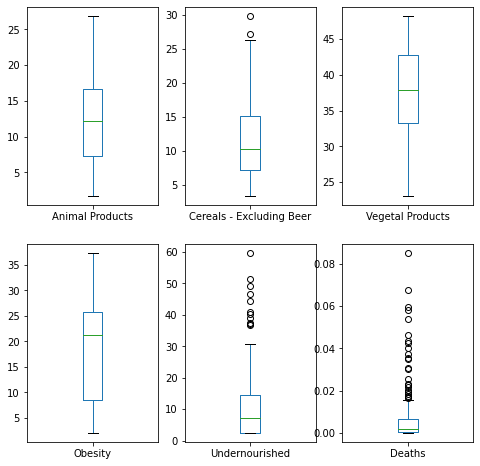

In [29]:
covid_food_data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False , figsize = (8,8))
plt.show()

#### We can see outliers for Undernourished and Death variables but they cannot be removed because deleting them will result in data error 

#### The following histograms show the distributions of each feature namely Animal Products, Obesity and Vegetal Products have a roughly normal distribution

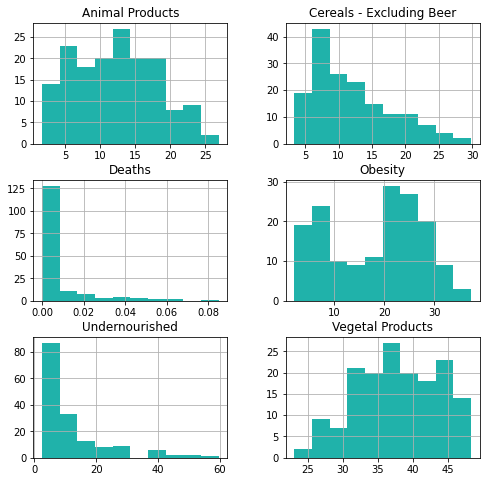

In [30]:
num=covid_food_data.select_dtypes(include=['int64','float64'])
num.hist(figsize=(8,8), color = 'lightseagreen')
plt.show()

#### In the below steps we are trying to establish a relationship between the Death Rate and the food supply in top 15 countries with highest death rate reported and the 15 countries with lower death rate

In [31]:
#Sorting the data on the column 'Deaths' from lowest to highest
sorted_data_byDeath = covid_food_data.sort_values(by=['Deaths'])

In [32]:
selected_columns = ['Animal Products','Cereals - Excluding Beer','Vegetal Products','Obesity','Deaths']

In [33]:
# Trying to segregate the Countries with highest and lowest 'Deaths' 

#filtering the colums with zero death rate
sorted_data = sorted_data_byDeath[sorted_data_byDeath['Deaths'] != 0.0]

# considering the top 15 and bottom 15 countries based on death rate
lowest_deathRate_countries = sorted_data.head(15)
highest_deathRate_countries = sorted_data.tail(15)

In [34]:
# checking the mean value food consumption in highest and lowest affected countries based on death rate 
highest_mean = {c:np.round(highest_deathRate_countries[c].mean(), decimals=2) for c in selected_columns[:-1]}
print('Average values of foods consumed in countries with highest covid-19 death rate - ', highest_mean)

lowest_mean = {c:np.round(lowest_deathRate_countries[c].mean(), decimals=2) for c in selected_columns[:-1]}
print('Average values of foods consumed in countries with lowest covid-19 death rate - ', lowest_mean)

Average values of foods consumed in countries with highest covid-19 death rate -  {'Animal Products': 17.85, 'Cereals - Excluding Beer': 8.63, 'Vegetal Products': 32.15, 'Obesity': 25.13}
Average values of foods consumed in countries with lowest covid-19 death rate -  {'Animal Products': 6.86, 'Cereals - Excluding Beer': 17.0, 'Vegetal Products': 43.14, 'Obesity': 8.79}


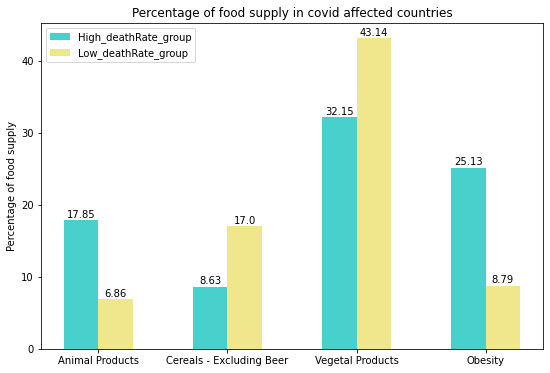

In [35]:
#function for displaying the percentages on the top of each rectangle in bar chart
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate('{}'.format(height), xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 1),  
                    textcoords="offset points", ha='center', va='bottom')
        
#locations of the labels
locations = np.array([0, 3, 6, 9])

#rectangle bar size
size = 0.8  

fig, ax = plt.subplots(figsize=(9, 6))
r1 = ax.bar(locations - size/2, highest_mean.values(), size, label='High_deathRate_group', color = 'mediumturquoise')
r2 = ax.bar(locations + size/2, lowest_mean.values(), label='Low_deathRate_group', color='khaki')

ax.set_xticks(locations)
ax.set_xticklabels(selected_columns[:-1])
ax.set_ylabel('Percentage of food supply')
ax.set_title('Percentage of food supply in covid affected countries')
ax.legend(loc='upper left')
autolabel(r1)
autolabel(r2)
plt.show()


#### It can be infered from the chart that, countries which consume higher percentage of vegetal products and cereals reported a lower death rate.
#### On the other hand, countries which consume animal products reported a higher death rate.

### Correlation Matrix for the Dataset
#### The following correlation table shows the correlation among all the features.

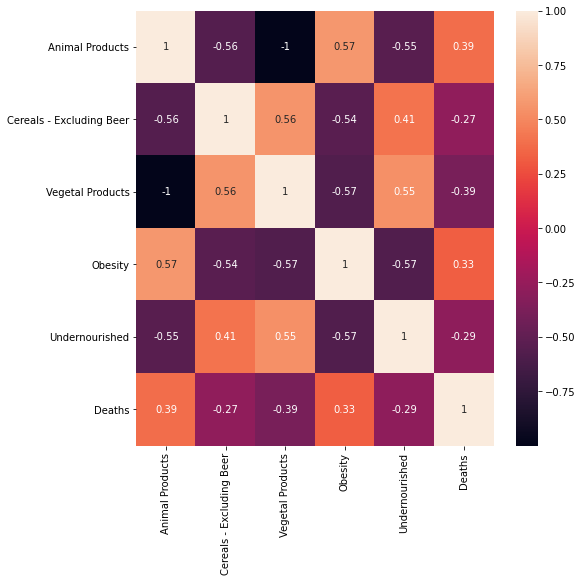

In [36]:
corr=covid_food_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

In [37]:
import altair as alt
chart = alt.Chart(covid_food_data).mark_point().encode(
    x='Animal Products',
    y='Obesity',
    color='Deaths'
).interactive()
chart.show()

Displaying chart at http://localhost:19949/


![title](../images/animal_products_chart.png)

In [38]:
import altair as alt
chart =  alt.Chart(covid_food_data).mark_point().encode(
    x='Vegetal Products',
    y='Obesity',
    color='Deaths'
).interactive()
chart.show()

Displaying chart at http://localhost:19949/


![title](../images/vegetal_products_chart.png)

#### It seems that animal products and obesity is positively correlated and vegetal products and obesity is negatively correlated. Countries that consume high vegetal products have lower obesity rates and countries that consume high animal products have higher obesity rates.

#### Note: The Deaths are not highly correlated with the food products and obesity

## Machine Learning 

### Unsupervised Learning(Clustering)

In [39]:
#Since all other foods sum up to animal products and vegetal products, we subsetted the data to include only those foods to avoid multi-colinearity
covid_index_data = covid_food_data['Country']
covid_food_data = covid_food_data[['Animal Products', 'Vegetal Products', 'Obesity', 'Undernourished', 'Deaths']]
covid_food_data.index = covid_index_data
covid_food_data

,Animal Products,Vegetal Products,Obesity,Undernourished,Deaths
Country,,,,,
Afghanistan,9.43,40.56,4.5,29.8000,0.0030
Albania,18.77,31.23,22.3,6.2000,0.0039
Algeria,9.63,40.37,26.6,3.9000,0.0024
Angola,4.93,45.07,6.8,25.0000,0.0001
Antigua and Barbuda,16.66,33.32,19.1,11.2294,0.0031
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),14.76,35.24,25.2,21.2000,0.0004
Vietnam,8.58,41.42,2.1,9.3000,0.0000
Yemen,5.79,44.21,14.1,38.9000,0.0015


#### Scaling the data before clustering with RobustScaler()

In [40]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
covid_food_data[['Animal Products', 'Vegetal Products', 'Obesity', 'Undernourished', 'Deaths']] = scaler.fit_transform(covid_food_data[['Animal Products', 'Vegetal Products', 'Obesity', 'Undernourished', 'Deaths']])
covid_food_data

,Animal Products,Vegetal Products,Obesity,Undernourished,Deaths
Country,,,,,
Afghanistan,-0.286624,0.286017,-0.976608,1.891667,0.174603
Albania,0.704883,-0.702331,0.064327,-0.075000,0.317460
Algeria,-0.265393,0.265890,0.315789,-0.266667,0.079365
Angola,-0.764331,0.763771,-0.842105,1.491667,-0.285714
Antigua and Barbuda,0.480892,-0.480932,-0.122807,0.344117,0.190476
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0.279193,-0.277542,0.233918,1.175000,-0.238095
Vietnam,-0.376858,0.377119,-1.116959,0.183333,-0.301587
Yemen,-0.673036,0.672669,-0.415205,2.650000,-0.063492


In [41]:
covid_food_data2

,Animal Products,Vegetal Products,Obesity,Undernourished,Deaths
0,9.43,40.56,4.5,29.8000,0.0030
1,18.77,31.23,22.3,6.2000,0.0039
2,9.63,40.37,26.6,3.9000,0.0024
3,4.93,45.07,6.8,25.0000,0.0001
4,16.66,33.32,19.1,11.2294,0.0031
...,...,...,...,...,...
156,14.76,35.24,25.2,21.2000,0.0004
157,8.58,41.42,2.1,9.3000,0.0000
158,5.79,44.21,14.1,38.9000,0.0015
159,6.02,43.98,6.5,46.7000,0.0007


###### Checking to see how much variability each principle component captures

In [42]:
from sklearn.decomposition import PCA
pca = PCA(random_state=101)
pca.fit(covid_food_data)
pca.explained_variance_ratio_

array([7.57598627e-01, 1.67612602e-01, 5.34343774e-02, 2.13543641e-02,
       2.91228747e-08])

#### We can capture close to 90% of the variation from the first two components so we will proceed with 2 components

In [43]:
pca = PCA(n_components=2, random_state=101)
score = pca.fit_transform(covid_food_data[['Animal Products', 'Vegetal Products', 'Obesity', 'Undernourished', 'Deaths']])
pd.DataFrame(score)

,0,1
0,-1.114012,1.424461
1,-0.299161,-1.065971
2,-0.729376,-0.581713
3,-1.606635,1.347764
4,-0.565700,-0.561432
...,...,...
156,-1.132115,-0.012878
157,-1.335539,0.165518
158,-1.513970,2.052515
159,-1.777150,2.608861


In [44]:
pca_components = pd.DataFrame(score)
pca_components.index = covid_index_data
pca_components

,0,1
Country,,
Afghanistan,-1.114012,1.424461
Albania,-0.299161,-1.065971
Algeria,-0.729376,-0.581713
Angola,-1.606635,1.347764
Antigua and Barbuda,-0.565700,-0.561432
...,...,...
Venezuela (Bolivarian Republic of),-1.132115,-0.012878
Vietnam,-1.335539,0.165518
Yemen,-1.513970,2.052515


### KMeans

In [45]:
# performing a KMeans with 3 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit(pca_components)
covid_food_data['Component1'] = pca_components.iloc[:,0]
covid_food_data['Component2'] = pca_components.iloc[:,1]
covid_food_data['labels'] = y_kmeans.labels_

In [46]:
covid_food_data.head()
covid_food_data.to_csv('labeled.csv')

#### Clustering visualization

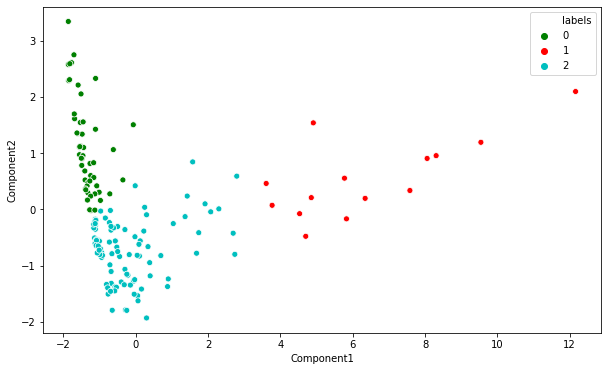

In [47]:
plt.figure(figsize=(10,6)) 
sns.scatterplot(covid_food_data['Component1'], covid_food_data['Component2'], hue=covid_food_data['labels'], palette=['g', 'r', 'c'] )


## Hierarchical Clustering

#### In KMeans clustering, we need to decide the clusters before implementing the algorithm. Sometimes, we may not correctly interpret the number of clusters and it becomes challenging to predict the number of clusters.

#### For Hierarchical clustering we do not need to know the number of clusters prior implementing the algorithm

In [48]:
covid_food_data2

,Animal Products,Vegetal Products,Obesity,Undernourished,Deaths
0,9.43,40.56,4.5,29.8000,0.0030
1,18.77,31.23,22.3,6.2000,0.0039
2,9.63,40.37,26.6,3.9000,0.0024
3,4.93,45.07,6.8,25.0000,0.0001
4,16.66,33.32,19.1,11.2294,0.0031
...,...,...,...,...,...
156,14.76,35.24,25.2,21.2000,0.0004
157,8.58,41.42,2.1,9.3000,0.0000
158,5.79,44.21,14.1,38.9000,0.0015
159,6.02,43.98,6.5,46.7000,0.0007


#### The columns in the covid food dataframe are Animal Products, Vegetal Products, Obesity, Undernourished, Deaths. We are aiming to make clusters from the dataframe with the help of Hierarchical Clustering.

#### Before implementing Hierarchical Clustering, the data should be normalized so as to maintain same for each variable. If the variables are not scaled, there are chances that the model might become biased towards the variables with a larger magnitude.

In [49]:
%matplotlib inline
from sklearn.preprocessing import normalize
data_scaled = normalize(covid_food_data2)
data_scaled = pd.DataFrame(data_scaled, columns=covid_food_data2.columns)
data_scaled.head()

,Animal Products,Vegetal Products,Obesity,Undernourished,Deaths
0,0.183450,0.789050,0.087543,0.579726,0.000058
1,0.434827,0.723476,0.516603,0.143630,0.000090
2,0.194745,0.816390,0.537924,0.078868,0.000049
3,0.094410,0.863092,0.130220,0.478751,0.000002
4,0.384368,0.768737,0.440663,0.259077,0.000072


#### From the above table it can be infered that the scale of all the variables is almost similar. Let’s proceed further and plot the dendrogram to decide on the number of clusters.

#### Using the linkage() function to obtain a hierarchical clustering on the data samples, and using Dendrogram to visualize the result.

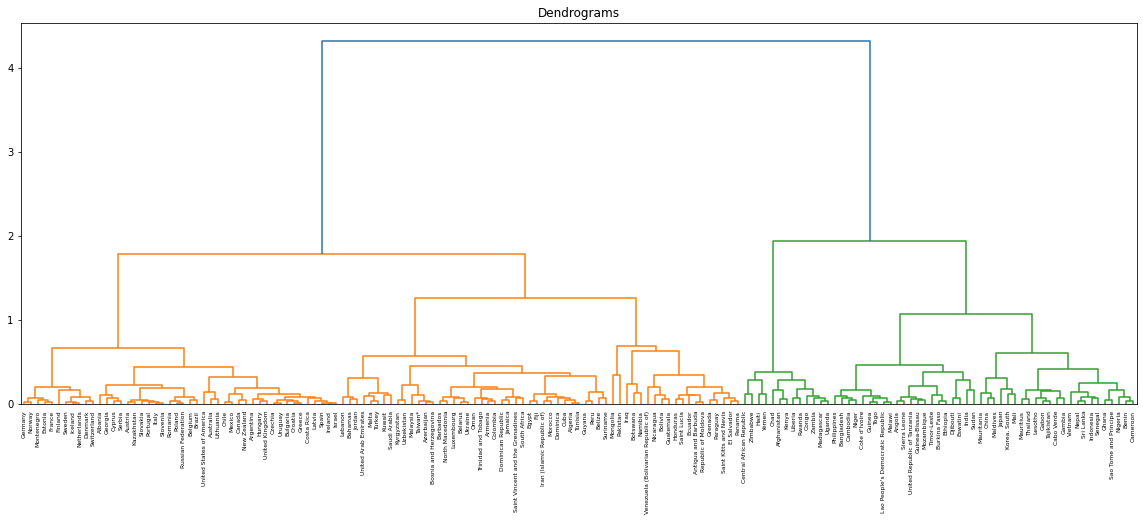

In [50]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'), labels=country_list, leaf_rotation=90,
           leaf_font_size=6)

#### In a Dendogram x-axis represents the samples and y-axis represents the distance between the samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 3 to cut the dendrogram:

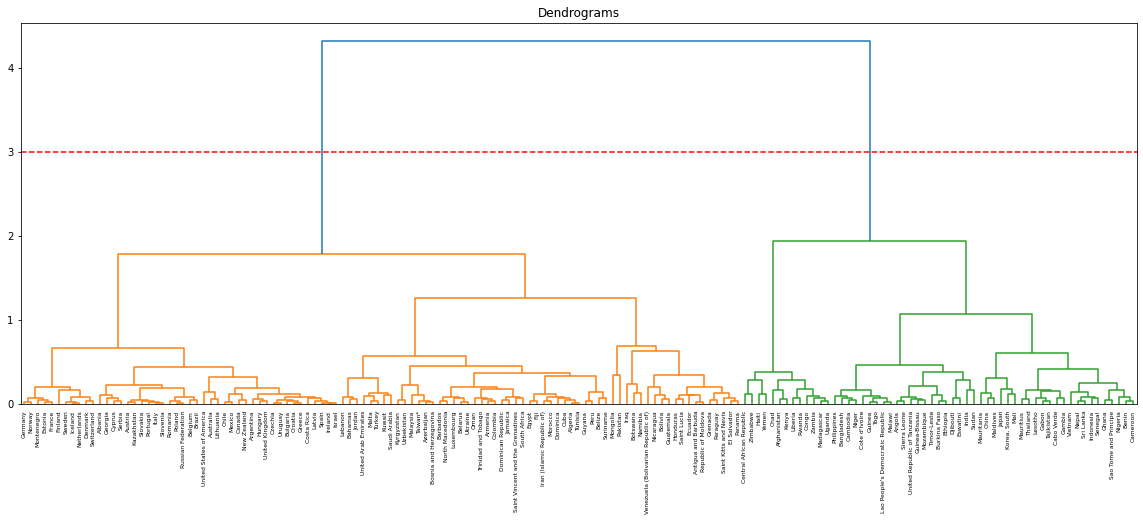

In [51]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'), labels=country_list, leaf_rotation=90,
           leaf_font_size=6)
plt.axhline(y=3, color='r', linestyle='--')

#### The line cuts the dendogram at two points. So, we have two clusters. Applying the Agglomerative hierarchical clustering for 2 clusters.

In [52]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0])

#### Since, two clusters are defined, we can see the values of 0s and 1s in the output array. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. 

#### Plotting the scatter plot to visually see these cluster points. 

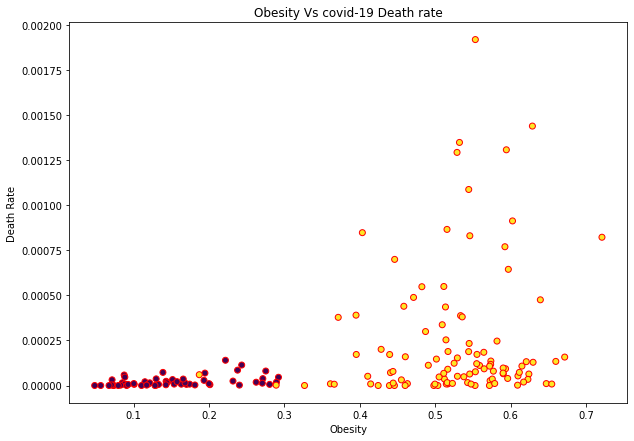

In [53]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Obesity'], data_scaled['Deaths'], c=cluster.labels_, edgecolors='r' ) 
plt.title("Obesity Vs covid-19 Death rate"), 
plt.xlabel("Obesity")
plt.ylabel("Death Rate")
plt.show()

#### We can visually see the two clusters in the scatter plot for Obesity Vs COVID-19 Death rate.

## Supervised Learning (Decision Trees)

In [54]:
covid_food_data

,Animal Products,Vegetal Products,Obesity,Undernourished,Deaths,Component1,Component2,labels
Country,,,,,,,,
Afghanistan,-0.286624,0.286017,-0.976608,1.891667,0.174603,-1.114012,1.424461,0
Albania,0.704883,-0.702331,0.064327,-0.075000,0.317460,-0.299161,-1.065971,2
Algeria,-0.265393,0.265890,0.315789,-0.266667,0.079365,-0.729376,-0.581713,2
Angola,-0.764331,0.763771,-0.842105,1.491667,-0.285714,-1.606635,1.347764,0
Antigua and Barbuda,0.480892,-0.480932,-0.122807,0.344117,0.190476,-0.565700,-0.561432,2
...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0.279193,-0.277542,0.233918,1.175000,-0.238095,-1.132115,-0.012878,0
Vietnam,-0.376858,0.377119,-1.116959,0.183333,-0.301587,-1.335539,0.165518,0
Yemen,-0.673036,0.672669,-0.415205,2.650000,-0.063492,-1.513970,2.052515,0


In [55]:
# Building decision trees to describe the clusters
# Extracting initial features
X = covid_food_data.iloc[:,0:5]
X.head()

,Animal Products,Vegetal Products,Obesity,Undernourished,Deaths
Country,,,,,
Afghanistan,-0.286624,0.286017,-0.976608,1.891667,0.174603
Albania,0.704883,-0.702331,0.064327,-0.075000,0.317460
Algeria,-0.265393,0.265890,0.315789,-0.266667,0.079365
Angola,-0.764331,0.763771,-0.842105,1.491667,-0.285714
Antigua and Barbuda,0.480892,-0.480932,-0.122807,0.344117,0.190476


In [56]:
#Extracting predicted cluster labels
y = covid_food_data['labels']
y.head()

Country
Afghanistan            0
Albania                2
Algeria                2
Angola                 0
Antigua and Barbuda    2
Name: labels, dtype: int32

[Text(465.0, 815.4, 'Obesity <= -0.354\ngini = 0.546\nsamples = 161\nvalue = [54, 14, 93]\nclass = Cluster3'),
 Text(186.0, 634.2, 'Vegetal Products <= -0.12\ngini = 0.238\nsamples = 58\nvalue = [50, 0, 8]\nclass = Cluster1'),
 Text(93.0, 453.0, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = Cluster3'),
 Text(279.0, 453.0, 'Undernourished <= -0.029\ngini = 0.107\nsamples = 53\nvalue = [50, 0, 3]\nclass = Cluster1'),
 Text(186.0, 271.80000000000007, 'Animal Products <= -0.642\ngini = 0.375\nsamples = 4\nvalue = [1, 0, 3]\nclass = Cluster3'),
 Text(93.0, 90.60000000000002, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Cluster1'),
 Text(279.0, 90.60000000000002, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Cluster3'),
 Text(372.0, 271.80000000000007, 'gini = 0.0\nsamples = 49\nvalue = [49, 0, 0]\nclass = Cluster1'),
 Text(744.0, 634.2, 'Deaths <= 4.135\ngini = 0.299\nsamples = 103\nvalue = [4, 14, 85]\nclass = Cluster3'),
 Text(651.0, 453.0, 'Undernourished <= 1.004\n

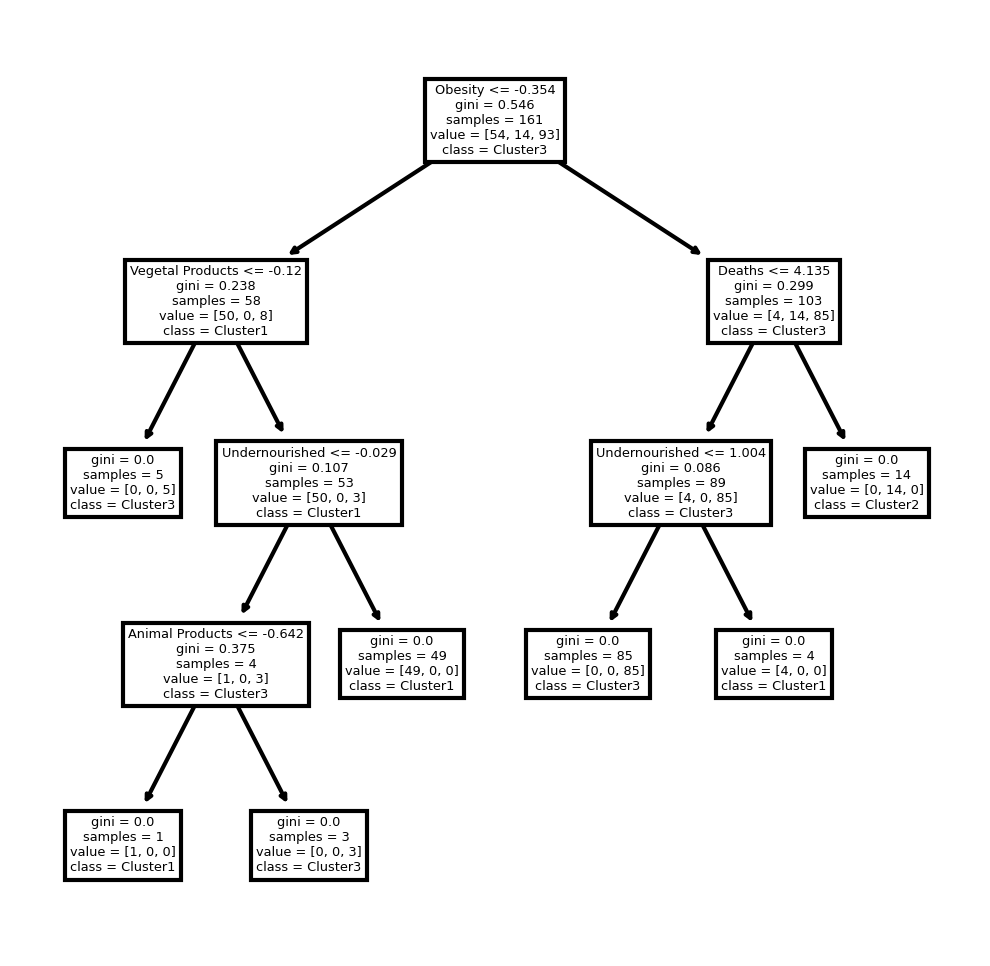

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree

dt = DecisionTreeClassifier(random_state=101)
dt.fit(X, y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
fn = ['Animal Products', 'Vegetal Products', 'Obesity', 'Undernourished', 'Deaths']
cn = ['Cluster1' , 'Cluster2', 'Cluster3']

tree.plot_tree(dt, feature_names = fn, class_names=cn)


#### It seems that cluster 1 can be described by countries that obesity greater than -0.354, consume less than -0.12 vegetal products, and have undernourishment rate less than -0.029. Cluster 2 can be described by countries that have obesity greater than -0.354, deaths > 3.4, and undernourishment rate greater than 1.392. Cluster 3 can be described by countries that have obesity greater than -0.354, and deaths less than 3.4. 

#### Based on this cluster 2 contains countries that have the highest fatalities, and should make lifestyle / policy changes for the future.

## Evaluation

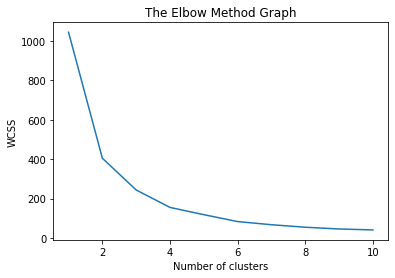

In [58]:
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(score)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Optimal number of clusters to reduce the within cluster sum of squares to 200 is 3 clusters
#### Updated the model in machine learning section to use 3 clusters

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30  0  6]
 [ 0 12  0]
 [ 3  0 62]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        36
           1       1.00      1.00      1.00        12
           2       0.91      0.95      0.93        65

    accuracy                           0.92       113
   macro avg       0.94      0.93      0.93       113
weighted avg       0.92      0.92      0.92       113



#### Using a 70-30 split, we were able to get 88% accuracy on predicting which cluster a country belongs to based on food and health factors of the country.